In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

from sklearn.model_selection import train_test_split
from google.colab import files

In [ ]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!ls

kaggle.json  sample_data


Копируем токен в каталог .kaggle

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

## Загружаем данные с сайта Kaggle

In [ ]:
!kaggle competitions download -c digit-recognizer

 85% 13.0M/15.3M [00:00<00:00, 131MB/s]
100% 15.3M/15.3M [00:00<00:00, 140MB/s]


In [ ]:
!ls

digit-recognizer.zip  sample_data


In [ ]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!unzip test.csv.zip

unzip:  cannot find or open test.csv.zip, test.csv.zip.zip or test.csv.zip.ZIP.


In [ ]:
!unzip train.csv.zip

unzip:  cannot find or open train.csv.zip, train.csv.zip.zip or train.csv.zip.ZIP.


In [ ]:
!head train.csv

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel1

In [ ]:
train = np.loadtxt('/content/train.csv', delimiter=',', skiprows=1)

In [ ]:
train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train.shape

(42000, 785)

In [ ]:
x_train = train[:, 1:]
y_train = train[:, 0]

x_train = x_train.reshape(42000, 28, 28, 1)

In [ ]:
x_train.shape, y_train.shape

((42000, 28, 28, 1), (42000,))

In [ ]:
y_train[:10]

array([1., 0., 1., 4., 0., 0., 7., 3., 5., 3.])

In [ ]:
x_train /= 255.0

In [ ]:
y_train = to_categorical(y_train, 10)

In [ ]:
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
model = Sequential()

model.add(Input((28, 28, 1)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, 'relu'))
model.add(Dense(128, 'relu'))
model.add(Dense(10, 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
сheckpoint = ModelCheckpoint('mnist-cnn.keras',
                              monitor='val_accuracy',
                              save_best_only=True,
                              verbose=1)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, callbacks=[сheckpoint, learning_rate_reduction], verbose=1)

Epoch 1/10
1181/1182 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9221 - loss: 0.2498
Epoch 1: val_accuracy improved from -inf to 0.97952, saving model to mnist-cnn.keras
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 91s 73ms/step - accuracy: 0.9221 - loss: 0.2496 - val_accuracy: 0.9795 - val_loss: 0.0776 - learning_rate: 0.0010
Epoch 2/10
1181/1182 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9857 - loss: 0.0491
Epoch 2: val_accuracy did not improve from 0.97952
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 84s 71ms/step - accuracy: 0.9857 - loss: 0.0491 - val_accuracy: 0.9767 - val_loss: 0.0775 - learning_rate: 0.0010
Epoch 3/10
1181/1182 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9896 - loss: 0.0357
Epoch 3: val_accuracy improved from 0.97952 to 0.98810, saving model to mnist-cnn.keras
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 85s 72ms/step - accuracy: 0.9896 - loss: 0.0357 - val_accuracy: 0.9881 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 4/10
1181/1182 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9903 

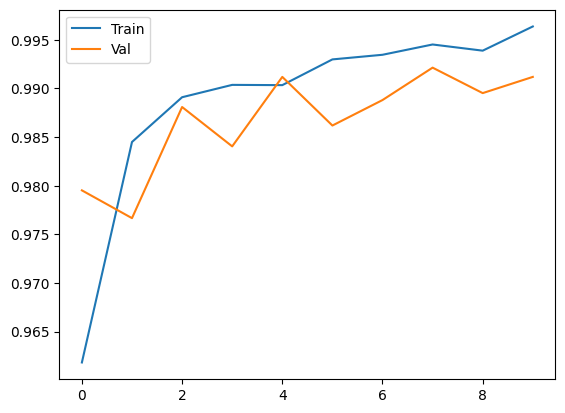

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()

In [ ]:
test = np.loadtxt('/content/test.csv', skiprows=1, delimiter=',')

In [ ]:
x_test = test.reshape(test.shape[0], 28, 28, 1)
x_test /= 255.0

In [ ]:
pred = model.predict(x_test)
pred[:5]

875/875 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step


array([[7.11089519e-22, 4.68589214e-21, 9.99999940e-01, 1.13406708e-19,
        1.82476935e-19, 7.72573040e-21, 1.50439564e-20, 5.41767879e-21,
        3.11962328e-19, 1.90666261e-24],
       [9.99999940e-01, 4.60496520e-20, 2.52878139e-16, 8.94341326e-16,
        3.84940409e-17, 1.92709368e-12, 7.64295294e-09, 5.10011566e-18,
        1.33257053e-14, 4.88459858e-13],
       [3.58008653e-12, 6.31715347e-10, 3.54458685e-11, 1.26522537e-09,
        8.94554614e-06, 2.22629424e-13, 8.02797975e-17, 1.29894720e-10,
        4.12945678e-09, 9.99991000e-01],
       [9.94939685e-01, 2.07195581e-06, 3.89566740e-05, 5.87471914e-05,
        4.47153343e-06, 1.35009695e-05, 3.20592051e-04, 6.03729313e-06,
        3.43597378e-04, 4.27224208e-03],
       [1.26331290e-15, 5.10352611e-12, 2.23362321e-07, 9.99999702e-01,
        1.77125753e-14, 6.57808830e-09, 1.23650222e-13, 2.61603621e-11,
        6.00731964e-10, 6.24684901e-14]], dtype=float32)

In [ ]:
pred = np.argmax(pred, axis=1)
pred[:5]

array([2, 0, 9, 0, 3])

In [ ]:
out = np.column_stack((range(1, pred.shape[0]+1), pred))

In [ ]:
np.savetxt('sample_submission.csv', out, header="ImageId,Label",
            comments="", fmt="%d,%d")

In [ ]:
!head submission.csv

head: cannot open 'submission.csv' for reading: No such file or directory


In [ ]:
!kaggle competitions submit -c digit-recognizer -m "Submition from Colab" -f sample_submission.csv

100% 208k/208k [00:00<00:00, 1.18MB/s]
Successfully submitted to Digit Recognizer

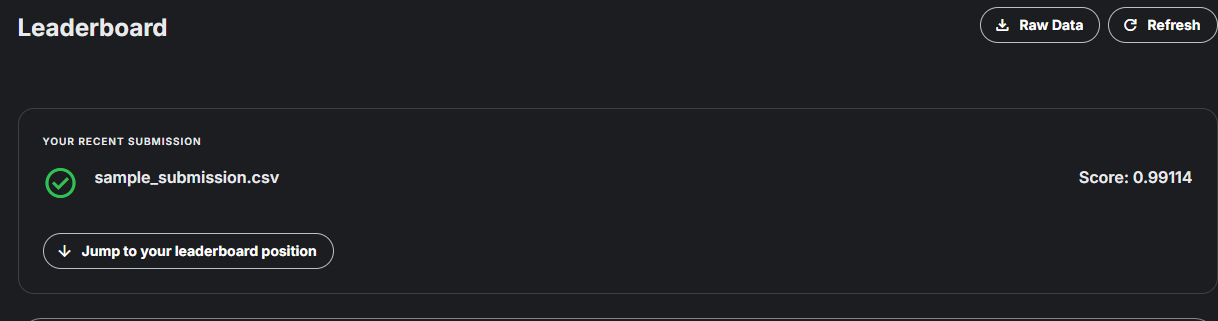